<b><font size = "4">Team Members

- Vinayashree K(D20038)
- Pooja N(D20020)
</b> 

<b><font size = "5">Goal : Lets do Exploratory Data Analysis on the the given data set and find 5 important factors that might affect the attrition</b>

In [1]:
#Importing all the libraries needed
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import pandas as pd 

In [2]:
#Reading the CSV file and assigning the data frame 
attrition_data = pd.read_csv("attrition.csv")

<b><font size = "5"> Studying the data</font> </b>

In [3]:
attrition_data.sample(5)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
87,51,0,Travel_Rarely,Research & Development,Life Sciences,4,Male,3,1,4,Married,2075,No,10,3,4,2,0,3,9
1348,40,0,Travel_Rarely,Research & Development,Life Sciences,1,Male,3,4,1,Divorced,16823,No,22,3,19,7,11,16,1
984,28,0,Travel_Rarely,Sales,Life Sciences,3,Male,2,2,1,Married,4724,No,5,3,5,3,0,4,26
1146,34,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,4,2,4,Divorced,4724,No,9,3,9,7,7,2,10
1061,24,0,Non-Travel,Sales,Life Sciences,4,Female,3,1,2,Married,2033,No,1,3,1,0,0,0,13


In [4]:
#Getting the number of rows and columns 
attrition_data.shape

(1470, 20)

In [5]:
#Column name and data types of all the columns
attrition_data.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
OverTime                   object
TotalWorkingYears           int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
DistanceFromHome            int64
dtype: object

In [6]:
#Describing numeric variables
attrition_data.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [7]:
#Describing categorical variable
attrition_data.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Married,No
freq,1043,961,606,882,673,1054


In [8]:
#Getting the values of all the categorical variables.
print(attrition_data['BusinessTravel'].value_counts(),"\n")
print(attrition_data['Department'].value_counts(),"\n")
print(attrition_data['EducationField'].value_counts(),"\n")
print(attrition_data['Gender'].value_counts(),"\n")
print(attrition_data['MaritalStatus'].value_counts(),"\n")
print(attrition_data['OverTime'].value_counts(),"\n")

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Male      882
Female    588
Name: Gender, dtype: int64 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

No     1054
Yes     416
Name: OverTime, dtype: int64 



In [9]:
attrition_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
DistanceFromHome           0
dtype: int64

In [10]:
attrition_data.duplicated().sum()

0

<b>Insights</b>
- Attrition has 0 or 1 value (0 being no attrition and 1 being attrition)
- We know that there are no null values in the data set.So we dont have to go for Imputation
- There are no duplicates in the dataset
- There are 1470 entries and 20 columns 
- There ae 14 integer columns and 6 object type columns.We know the values for all the categircal columns.
- mean age of workers is 36 with a std of 9 
- Avg monthly income is 6500 but median is 4919 so the monthly income is skewed
- People have a work experiance of 11 years on avg
- There are more married male who dont do overtime

Assmptions : Guessing the factors that might affect the attrition.
- Monthly income
- Distance from home
- Work life balance
- Overtime
- Job satisfaction
Lets do further analysis to see if our guess is correct

<b><font size = "5">Univariate Analysis</font></b>

<b>1.Distribution of all numerical variable</b>


/Users/vinayashreek/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


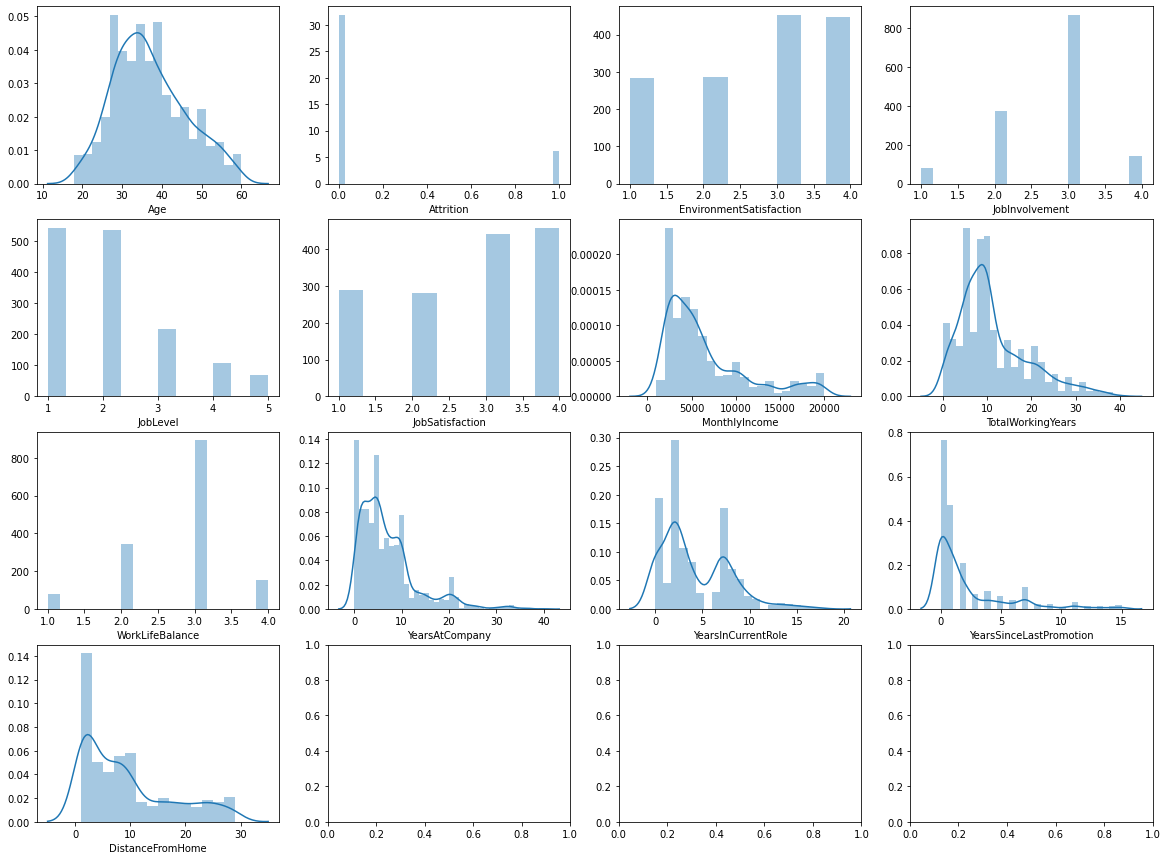

In [11]:
#Lets plot univariate distribution of all the numeric variables
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
sns.distplot(attrition_data['Age'], kde=True,ax=axes[0,0])
sns.distplot(attrition_data['Attrition'], kde=True,ax=axes[0,1])
sns.distplot(attrition_data['EnvironmentSatisfaction'], kde=False,ax=axes[0,2])
sns.distplot(attrition_data['JobInvolvement'], kde=False,ax=axes[0,3])
sns.distplot(attrition_data['JobLevel'], kde=False,ax=axes[1,0])
sns.distplot(attrition_data['JobSatisfaction'], kde=False,ax=axes[1,1])
sns.distplot(attrition_data['MonthlyIncome'], kde=True,ax=axes[1,2])
sns.distplot(attrition_data['TotalWorkingYears'], kde=True,ax=axes[1,3])
sns.distplot(attrition_data['WorkLifeBalance'], kde=False,ax=axes[2,0])
sns.distplot(attrition_data['YearsAtCompany'], kde=True,ax=axes[2,1])
sns.distplot(attrition_data['YearsInCurrentRole'], kde=True,ax=axes[2,2])
sns.distplot(attrition_data['YearsSinceLastPromotion'], kde=True,ax=axes[2,3])
sns.distplot(attrition_data['DistanceFromHome'], kde=True,ax=axes[3,0])
#sns.relplot(x="DistanceFromHome",hue="smoker", data=attrition_data);

<b>Insights :</b>
- Most of the people stay near the office
- People mostly dont spend more than 10 years in this company
- Peope who earn less than mean are much more than people who earn more than mean.There are very less people earning high salary .More people are at job level 1 and 2 this might be the reason for that
- Most people recently got promoted

<b> 2. Frequency distribution of all the categorical variables</b>

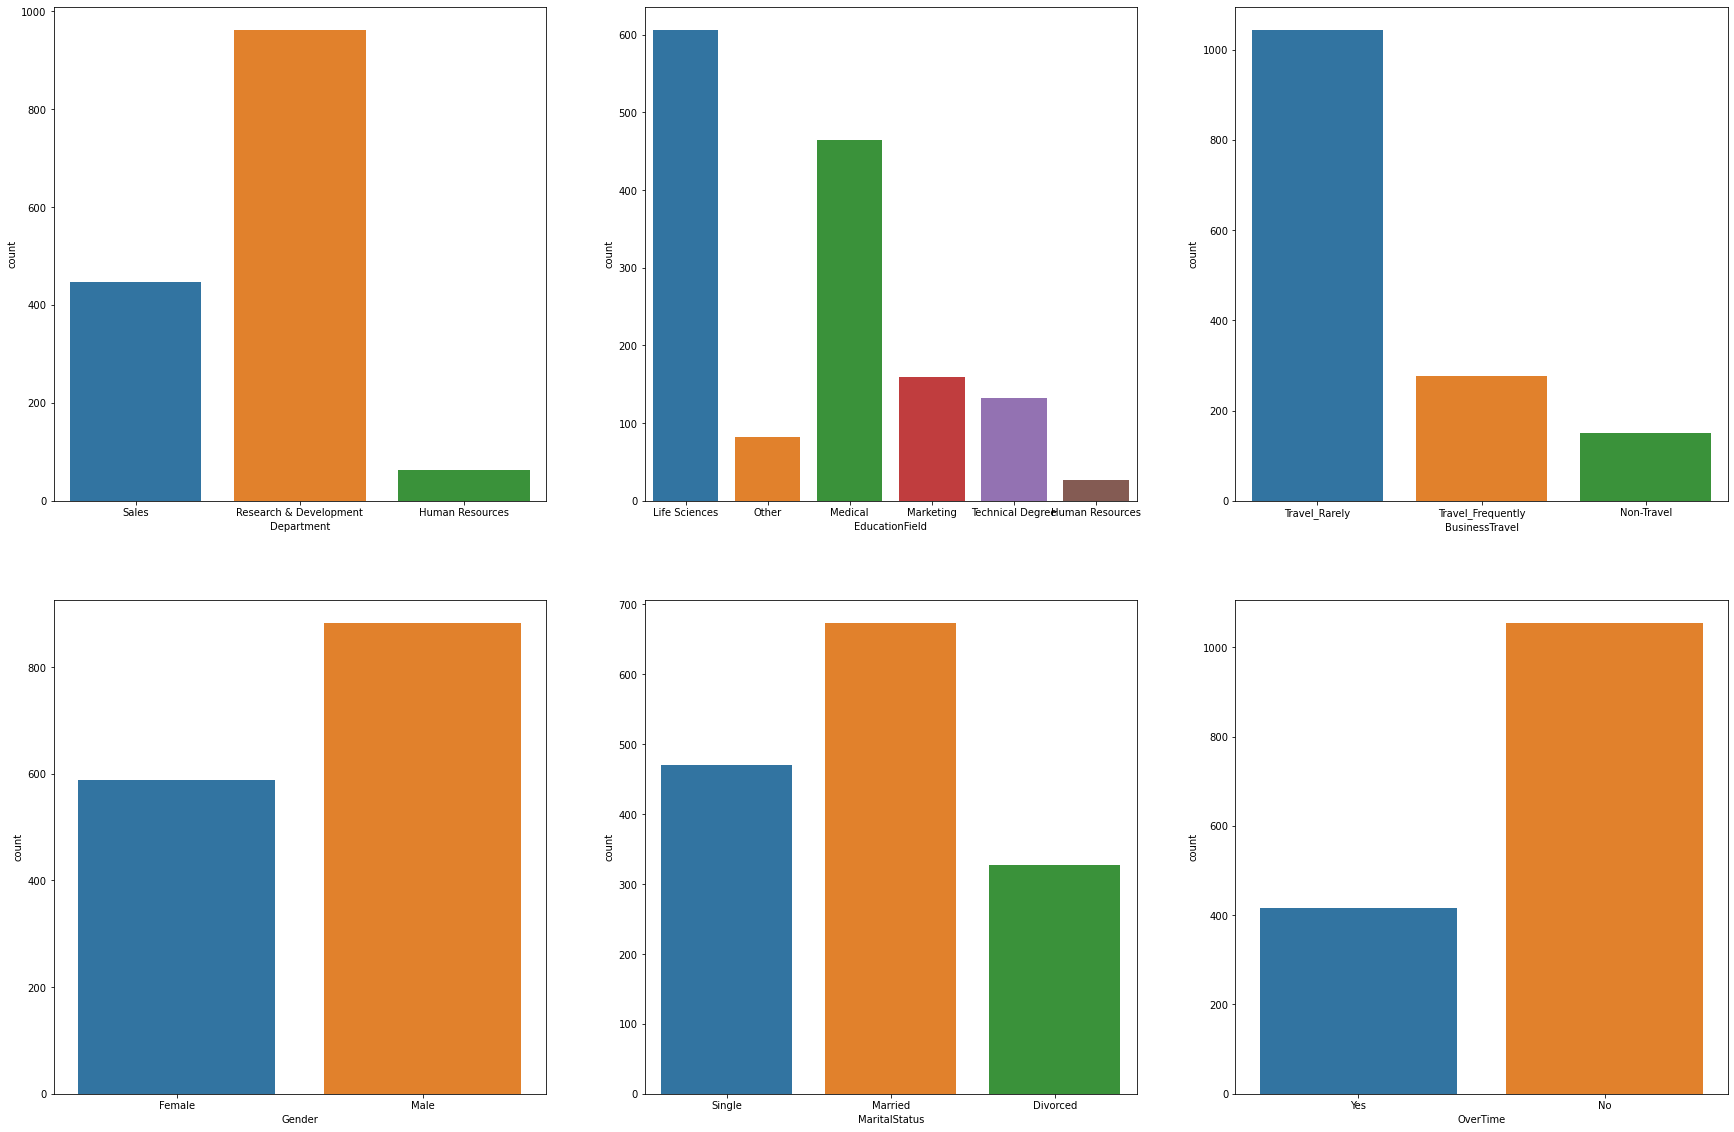

In [12]:
#Lets plot the frequence distribution of all the categorical variables.
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
sns.countplot('Department',data=attrition_data,ax=axes[0,0])
sns.countplot('EducationField',data=attrition_data,ax=axes[0,1])
sns.countplot('BusinessTravel',data=attrition_data,ax=axes[0,2])
sns.countplot('Gender',data=attrition_data,ax=axes[1,0])
sns.countplot('MaritalStatus',data=attrition_data,ax=axes[1,1])
sns.countplot('OverTime',data=attrition_data,ax=axes[1,2])

<b>Insights</b>
- Most of the people are in research & development field
- around 1/4th of people frequently travel
- There is almost 60:40 male to female ratio.That is not bad compared to women's global labour force participation rate of 26.5%
- Most of the people dont do overtime may be because they are married

<b>3.Distribution of attrition</b>

In [23]:
attrition_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

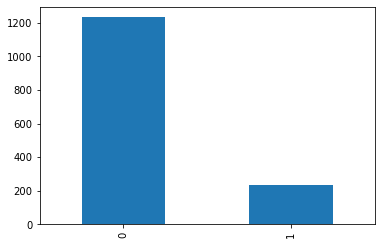

In [25]:
attrition_data['Attrition'].value_counts().sort_index().plot.bar()

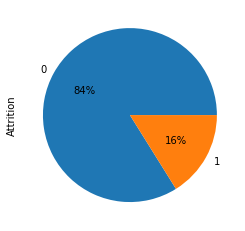

In [24]:
(attrition_data['Attrition'].value_counts(normalize=True) * 100).plot(kind='pie',use_index=True, autopct='%1.0f%%')

<b><font size = "5">Bivariate Analysis</font></b>

Lets see how some nominal,ordinal and interval variables are affecting the attrition

<b>1) BusinessTravel</b>
- Lets check some tables and graphs for business travel column to check how its affecting the attrition!


In [24]:
print('1)Total:',attrition_data['BusinessTravel'].count(),'\n',attrition_data['BusinessTravel'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.BusinessTravel)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

2)table of joint proportion
 BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                      138                208            887
1                       12                 69            156 

3)conditional probability conditioned on columns 
 BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92           0.750903       0.850431
1                     0.08           0.249097       0.149569 

4)conditional probability conditioned on rows 
 BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                 0.111922           0.168694       0.719384
1                 0.050633           0.291139       0.658228


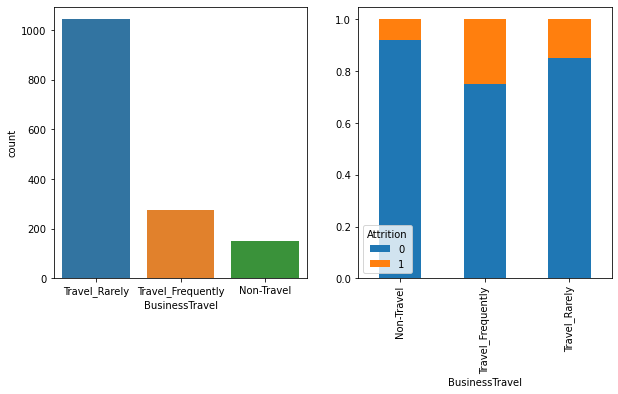

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('BusinessTravel',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['BusinessTravel'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax= ax2)

<b>Insights</b>
 - From the Total table(1) and the plot (1) its evident that most of the people rarely travel.
 - When we see the column wise conditional probability(table 3)and the plot(2) we can see that people who dont travel at all have very less probability probability(0.08) of leaving the company and people who travel frequently have significantly higher(0.24) probability of leaving which could mean that people arent hapy with travelling.So which means that this might be a potential factor affecting the attrition we can do further analysis on this.

<b>2) Department</b>
- Lets check some tables and graphs for Department column to check how its affecting the attrition!

In [26]:
print('1)Total:',attrition_data['Department'].count(),'\n',attrition_data['Department'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.Department)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

2)table of joint proportion
 Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92 

3)conditional probability conditioned on columns 
 Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.809524                0.861602  0.793722
1                  0.190476                0.138398  0.206278 

4)conditional probability conditioned on rows 
 Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.041363                0.671533  0.287105
1                  0.050633                0.561181  0.3881

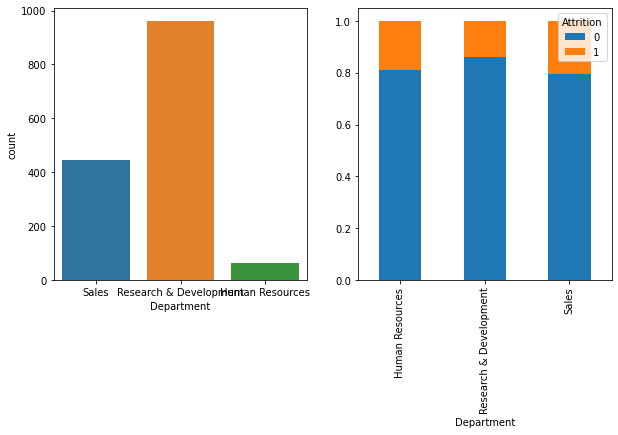

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('Department',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['Department'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax=ax2)

<b>Insights</b>
- From the first table and plot(1) we can infer that most of the employees in this company work for R&D department.
- When we see the columnwise conditional probability(Table 3) and the plot(2) above we can see that given someone is from human resources there is a 0.19 probability that the person has left the company similarly if he/she is from research and development it is 0.13  and in sales its 0.20 .It doesnt look like which department the employee belongs to affect the attrition much from plot too (there is a small relation but it is not significant enough)

<b>3) EducationField</b>
- Lets check some tables and graphs for EducationField column to check how its affecting the attrition!

In [28]:
print('1)Total:',attrition_data['EducationField'].count(),'\n',attrition_data['EducationField'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.EducationField)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

2)table of joint proportion
 EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
0                            20            517        124      401     71   
1                             7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
0                            100  
1                             32   

3)conditional probability conditioned on columns 
 EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
0                      0.740741       0.853135   0.779874  0.864224  0.865854   
1                      0.2592

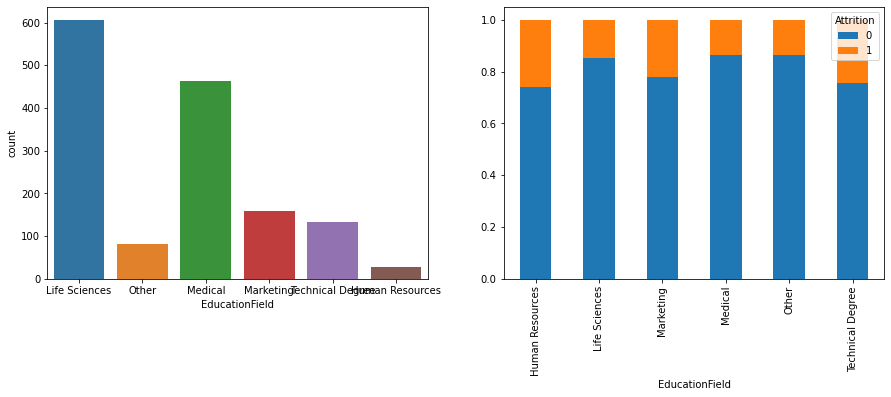

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.countplot('EducationField',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['EducationField'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax =ax2)

<b>Insights</b>
- From first table and first plot its evident that most people in the company are in lower job levels and this is a skewed distribution
- From columnwise conditional probability(table 3) and second plot table we can see that people who are from Human resouces and tech degree have around 0.25 probability of leaving where as its less in life sciences and medical (0.14) this may be due to the fact that the company is mainly a medical/life science related company and people from other fields dont find that comfortable working in this company . We can take this feature and analyze further

<b>4) JobLevel</b>
- Lets check some tables and graphs for JobLevel column to check how its affecting the attrition!

In [30]:
print('1)Total:',attrition_data['JobLevel'].count(),'\n',attrition_data['JobLevel'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.JobLevel)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64 

2)table of joint proportion
 JobLevel     1    2    3    4   5
Attrition                        
0          400  482  186  101  64
1          143   52   32    5   5 

3)conditional probability conditioned on columns 
 JobLevel          1         2         3        4         5
Attrition                                                 
0          0.736648  0.902622  0.853211  0.95283  0.927536
1          0.263352  0.097378  0.146789  0.04717  0.072464 

4)conditional probability conditioned on rows 
 JobLevel          1         2         3         4         5
Attrition                                                  
0          0.324412  0.390916  0.150852  0.081914  0.051906
1          0.603376  0.219409  0.135021  0.021097  0.021097


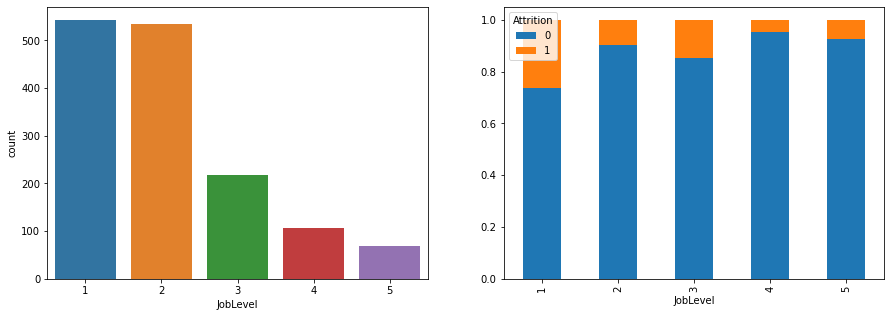

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.countplot('JobLevel',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['JobLevel'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax =ax2)

<b>Insights</b>
- First plot shows that this column is a skewed column as most people are in lower job levels and less people in higher job levels
- From columnwise conditional probability(table 3) and second plot table we can see that people in job level 1 has the highest probability of leaving(0.26) and it varies in different job levels.We can analyze this feature further 

<b>5) Gender</b>
- Lets check some tables and graphs for Gender column to check how its affecting the attrition!

In [32]:
print('1)Total:',attrition_data['Gender'].count(),'\n',attrition_data['Gender'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.Gender)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Male      882
Female    588
Name: Gender, dtype: int64 

2)table of joint proportion
 Gender     Female  Male
Attrition              
0             501   732
1              87   150 

3)conditional probability conditioned on columns 
 Gender       Female      Male
Attrition                    
0          0.852041  0.829932
1          0.147959  0.170068 

4)conditional probability conditioned on rows 
 Gender       Female      Male
Attrition                    
0          0.406326  0.593674
1          0.367089  0.632911


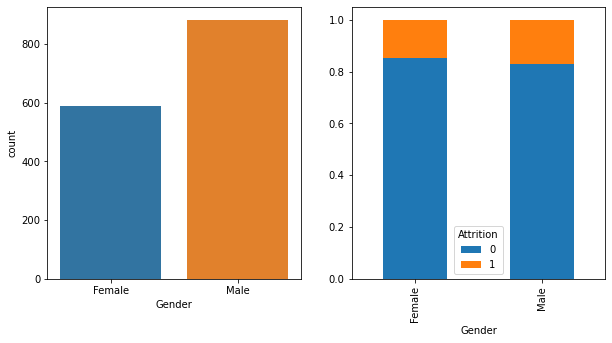

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('Gender',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['Gender'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax=ax2)

<b>Insights</b>

- Even though there are more male compared to female in this company probability of attrition given male/female is 0.17/0.14 which is almost equal(can be seen from columnwise conditional probability table) .So being a particular gender doesnt really affect the attrition much(Male has slighly higher chance of leaving but its not significant enough).

<b>6) MaritalStatus</b>
- Lets check some tables and graphs for MaritalStatus column to check how its affecting the attrition!

In [34]:
print('1)Total:',attrition_data['MaritalStatus'].count(),'\n',attrition_data['MaritalStatus'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns = attrition_data.MaritalStatus)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

2)table of joint proportion
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   294      589     350
1                    33       84     120 

3)conditional probability conditioned on columns 
 MaritalStatus  Divorced   Married    Single
Attrition                                  
0              0.899083  0.875186  0.744681
1              0.100917  0.124814  0.255319 

4)conditional probability conditioned on rows 
 MaritalStatus  Divorced   Married    Single
Attrition                                  
0              0.238443  0.477697  0.283861
1              0.139241  0.354430  0.506329


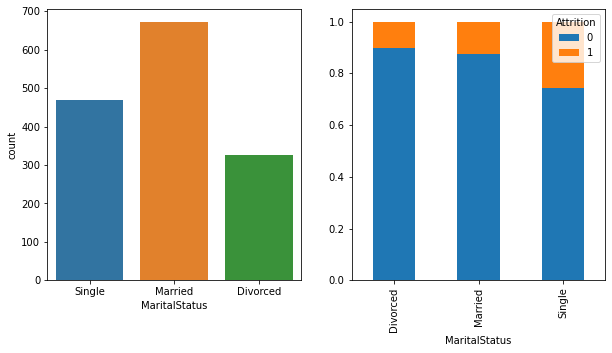

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('MaritalStatus',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['MaritalStatus'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax = ax2)

<b>Insights</b>
- From first table we can see that most of the people in the company are married 
- If a person is single there is 0.25 probability that he has left the company.But Divorced and married people seem comfortable in this company /they dont want to take risks (From third table).From numbers its evident that person's marital status affects the attrition

<b>7) OverTime</b>
- Lets check some tables and graphs for OverTime column to check how its affecting the attrition!

In [36]:
print('1)Total:',attrition_data['OverTime'].count(),'\n',attrition_data['OverTime'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.OverTime)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 No     1054
Yes     416
Name: OverTime, dtype: int64 

2)table of joint proportion
 OverTime    No  Yes
Attrition          
0          944  289
1          110  127 

3)conditional probability conditioned on columns 
 OverTime         No       Yes
Attrition                    
0          0.895636  0.694712
1          0.104364  0.305288 

4)conditional probability conditioned on rows 
 OverTime         No       Yes
Attrition                    
0          0.765612  0.234388
1          0.464135  0.535865


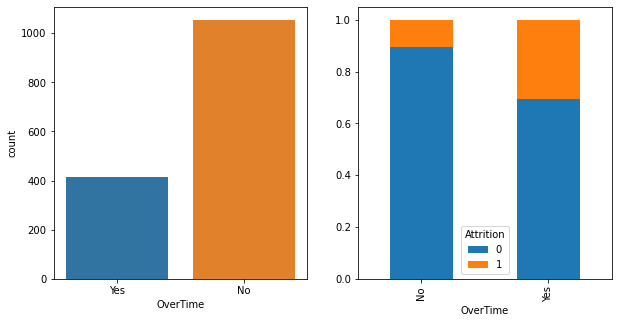

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('OverTime',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['OverTime'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax = ax2)

<b>Insights</b>
- We can see from first table that out of 1470 people only 416 people work overtime.
- If a person works overtime he has 0.3 probability of leaving whereas if he doesnt work overtime there is a probability of 0.1 of him leaving from conditional probability columnwise.So this might be a potential feature to consider.

<b>8) EnvironmentSatisfaction</b>
- Lets check some tables and graphs for EnvironmentSatisfaction column to check how its affecting the attrition!

In [38]:
print('1)Total:',attrition_data['EnvironmentSatisfaction'].count(),'\n',attrition_data['EnvironmentSatisfaction'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.EnvironmentSatisfaction)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64 

2)table of joint proportion
 EnvironmentSatisfaction    1    2    3    4
Attrition                                  
0                        212  244  391  386
1                         72   43   62   60 

3)conditional probability conditioned on columns 
 EnvironmentSatisfaction         1         2         3         4
Attrition                                                      
0                        0.746479  0.850174  0.863135  0.865471
1                        0.253521  0.149826  0.136865  0.134529 

4)conditional probability conditioned on rows 
 EnvironmentSatisfaction         1         2         3         4
Attrition                                                      
0                        0.171938  0.197891  0.317113  0.313058
1                        0.303797  0.181435  0.261603  0.253165


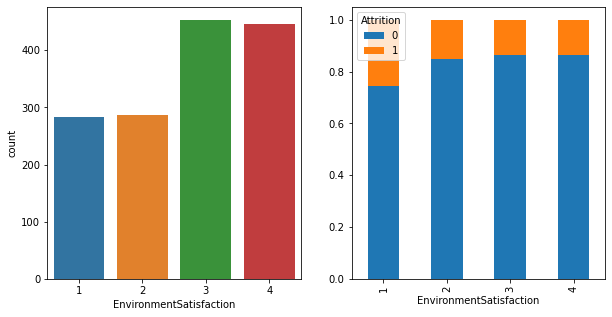

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('EnvironmentSatisfaction',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['EnvironmentSatisfaction'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax=ax2)

<b>Insights</b>
- From first plot we can see that more people are happy(environment satisfaction 3,4) and almost equal number of people are having environment satisfaction 1,2
- People who have very less environment satisfaction which is 1 have a 0.25 probability of leaving .Where as once the environment satisfaction becomes 2,3 or 4 this feature doesnt seem to impact much.So people who are very unhappy with the environment tend to leave .people who are okay or happy with the environment dont leave the company.

<b>9) WorkLifeBalance</b>
- Lets check some tables and graphs for WorkLifeBalance column to check how its affecting the attrition!

In [40]:
print('1)Total:',attrition_data['WorkLifeBalance'].count(),'\n',attrition_data['WorkLifeBalance'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.WorkLifeBalance)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64 

2)table of joint proportion
 WorkLifeBalance   1    2    3    4
Attrition                         
0                55  286  766  126
1                25   58  127   27 

3)conditional probability conditioned on columns 
 WorkLifeBalance       1         2         3         4
Attrition                                            
0                0.6875  0.831395  0.857783  0.823529
1                0.3125  0.168605  0.142217  0.176471 

4)conditional probability conditioned on rows 
 WorkLifeBalance         1         2         3         4
Attrition                                              
0                0.044607  0.231955  0.621249  0.102190
1                0.105485  0.244726  0.535865  0.113924


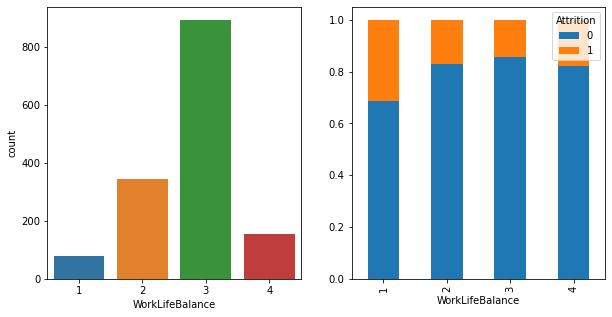

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('WorkLifeBalance',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['WorkLifeBalance'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax =ax2)

<b>Insights</b>
- In this company most of the peole generally have above avergae work life balance(3).Very less people have very bad work life balance.
- People who have a very low work life balance that is 1 have a 0.3 probability of leaving. but when people have work life balance as 2,3 or 4 everyone have almost similar probability of leaving which is around 0.15.Since for work life balance of 1 there is a higher difference in probability compared to 2,3,4 we can assume work life balance has affect on attrition given work life balance is 1.If its more than 1 it doesnt have much affect.

<b>10) JobInvolvement</b>
- Lets check some tables and graphs for JobInvolvement column to check how its affecting the attrition!

In [42]:
print('1)Total:',attrition_data['JobInvolvement'].count(),'\n',attrition_data['JobInvolvement'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.JobInvolvement)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64 

2)table of joint proportion
 JobInvolvement   1    2    3    4
Attrition                        
0               55  304  743  131
1               28   71  125   13 

3)conditional probability conditioned on columns 
 JobInvolvement         1         2         3         4
Attrition                                             
0               0.662651  0.810667  0.855991  0.909722
1               0.337349  0.189333  0.144009  0.090278 

4)conditional probability conditioned on rows 
 JobInvolvement         1         2         3         4
Attrition                                             
0               0.044607  0.246553  0.602595  0.106245
1               0.118143  0.299578  0.527426  0.054852


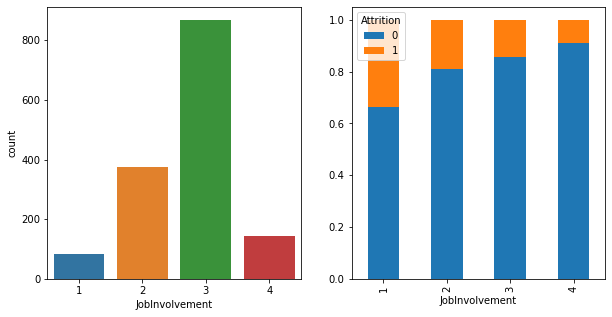

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('JobInvolvement',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['JobInvolvement'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True,ax = ax2)

<b>Insights</b>
- From plot 1 we can see that most of the people have an above avergae job involvement
- People who dont involve in job have higher probability of leaving and people who are highly involved in their job have very less probability of leaving from plot 2

<b>10) JobSatisfaction</b>
- Lets check some tables and graphs for JobSatisfaction column to check how its affecting the attrition!

In [44]:
print('1)Total:',attrition_data['JobSatisfaction'].count(),'\n',attrition_data['JobSatisfaction'].value_counts(),'\n')
table = pd.crosstab(attrition_data.Attrition,columns= attrition_data.JobSatisfaction)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64 

2)table of joint proportion
 JobSatisfaction    1    2    3    4
Attrition                          
0                223  234  369  407
1                 66   46   73   52 

3)conditional probability conditioned on columns 
 JobSatisfaction         1         2         3        4
Attrition                                             
0                0.771626  0.835714  0.834842  0.88671
1                0.228374  0.164286  0.165158  0.11329 

4)conditional probability conditioned on rows 
 JobSatisfaction         1         2         3         4
Attrition                                              
0                0.180860  0.189781  0.299270  0.330089
1                0.278481  0.194093  0.308017  0.219409


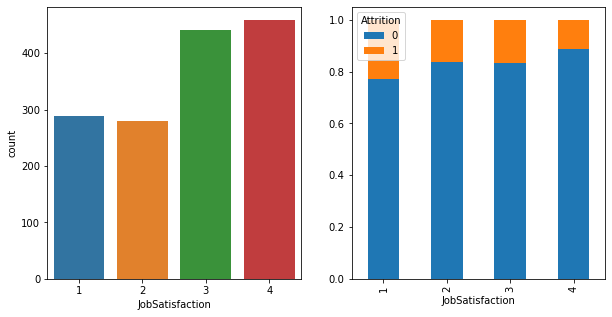

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('JobSatisfaction',data=attrition_data,ax=ax1)
ct=pd.crosstab(attrition_data['JobSatisfaction'],attrition_data['Attrition'], normalize='index')
ct.plot.bar(stacked=True, ax=ax2)

<b>Insights</b>
- More people are happy with the job(Plot 1)
- Even though people who have a job satisfaction of 1 have slightly higher probability of leaving compared to people who have job satisfaction of 2,3 or 4 .Difference is not that significant(Plot 2)

<b>From the above factors lets pick few factors that seem to affect the attrition the most</b>
- Marital status
- Business travel
- Overtime
- Job involvement
- Job level
</b>

<b>Lets plot side by side box plot to see how attrition is getting affected by the numerical variables</b>

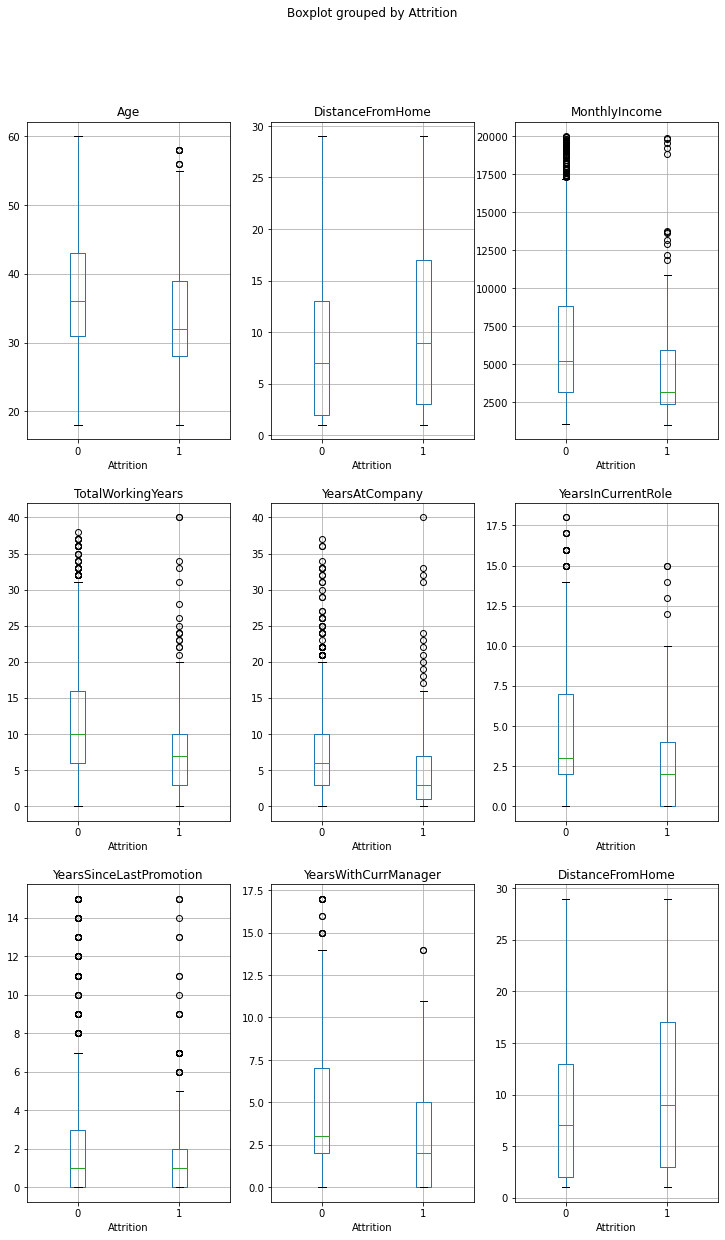

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(12, 20))
attrition_data.boxplot(column="Age", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[0,0])
attrition_data.boxplot(column="DistanceFromHome", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[0,1])
attrition_data.boxplot(column="MonthlyIncome", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[0,2])
attrition_data.boxplot(column="TotalWorkingYears", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[1,0])
attrition_data.boxplot(column="YearsAtCompany", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[1,1])
attrition_data.boxplot(column="YearsInCurrentRole", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[1,2])
attrition_data.boxplot(column="YearsSinceLastPromotion", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[2,0])
attrition_data.boxplot(column="YearsWithCurrManager", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[2,1])
attrition_data.boxplot(column="DistanceFromHome", notch=False,by="Attrition",grid=True,figsize=(8,6),ax=axes[2,2])

- Lets analyze further

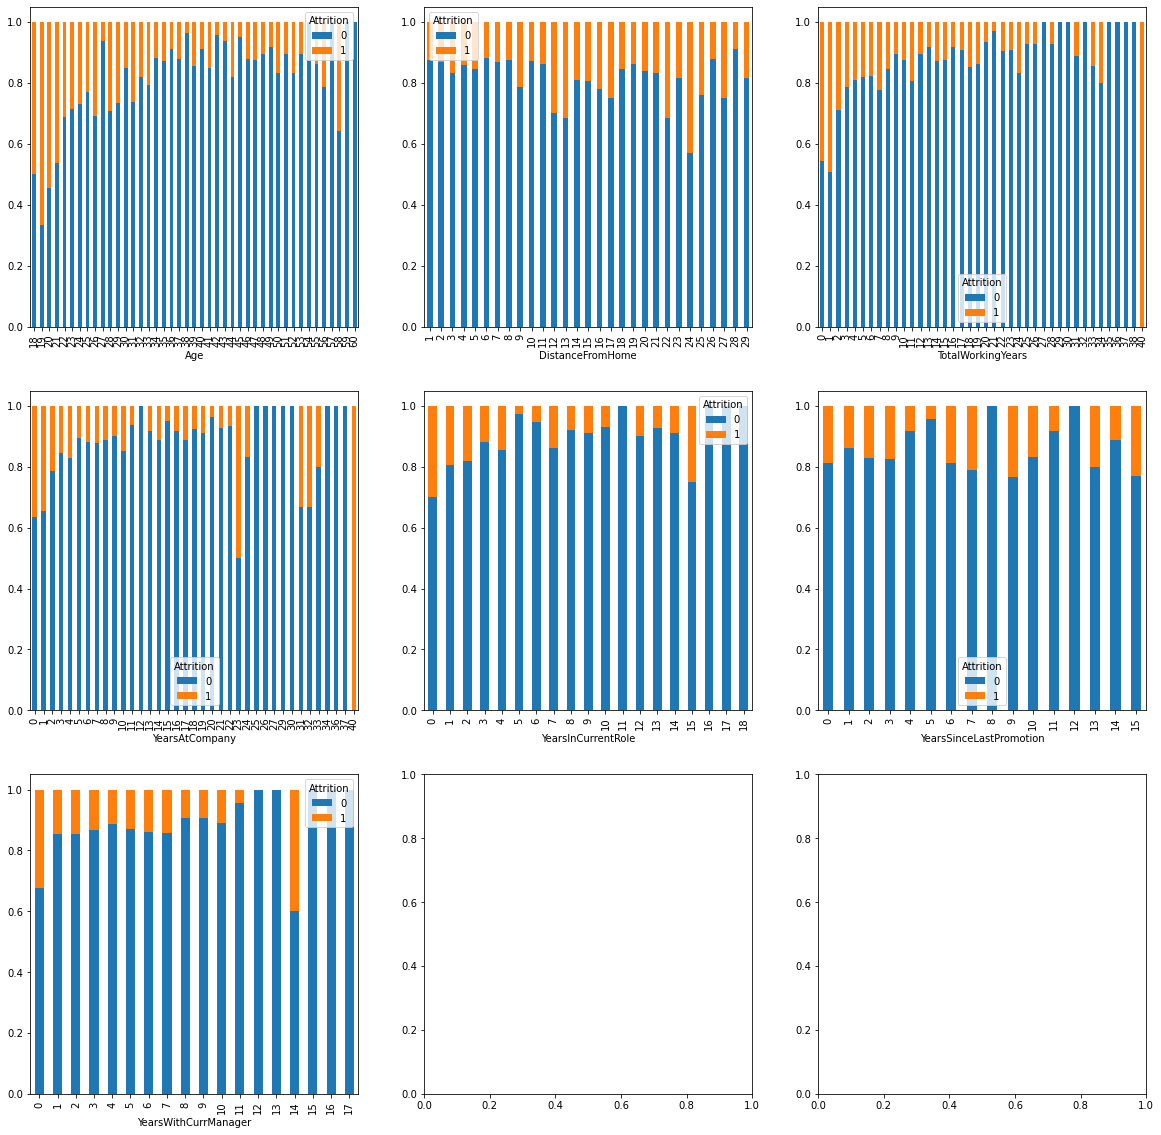

In [47]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
ct1=pd.crosstab(attrition_data['Age'],attrition_data['Attrition'], normalize='index')
ct1.plot.bar(stacked=True,ax=axes[0,0])
ct4=pd.crosstab(attrition_data['DistanceFromHome'],attrition_data['Attrition'], normalize='index')
ct4.plot.bar(stacked=True,ax=axes[0,1])
ct6=pd.crosstab(attrition_data['TotalWorkingYears'],attrition_data['Attrition'], normalize='index')
ct6.plot.bar(stacked=True,ax=axes[0,2])
ct8=pd.crosstab(attrition_data['YearsAtCompany'],attrition_data['Attrition'], normalize='index')
ct8.plot.bar(stacked=True,ax=axes[1,0])
ct9=pd.crosstab(attrition_data['YearsInCurrentRole'],attrition_data['Attrition'], normalize='index')
ct9.plot.bar(stacked=True,ax=axes[1,1])
ct10=pd.crosstab(attrition_data['YearsSinceLastPromotion'],attrition_data['Attrition'], normalize='index')
ct10.plot.bar(stacked=True,ax=axes[1,2])
ct11=pd.crosstab(attrition_data['YearsWithCurrManager'],attrition_data['Attrition'], normalize='index')
ct11.plot.bar(stacked=True,ax=axes[2,0])

<b>insights</b>
- From Box plot and crosstab plot it looks like Age and total working years might be our potential factors affecting the attrition. lets analyze it further

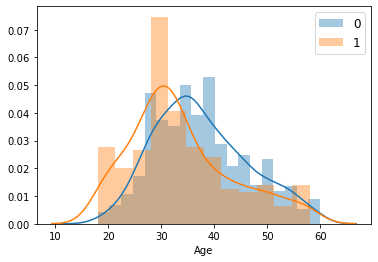

In [48]:
df = attrition_data[attrition_data.Attrition == 0]
sns.distplot(df['Age'], hist = True, kde = True, label='0')
df = attrition_data[attrition_data.Attrition == 1]
sns.distplot(df['Age'], hist = True, kde = True, label='1')
plt.legend(prop={'size': 12})

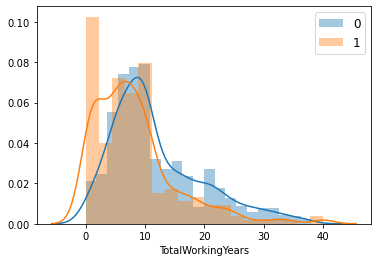

In [49]:
df = attrition_data[attrition_data.Attrition == 0]
sns.distplot(df['TotalWorkingYears'], hist = True, kde = True, label='0')
df = attrition_data[attrition_data.Attrition == 1]
sns.distplot(df['TotalWorkingYears'], hist = True, kde = True, label='1')
plt.legend(prop={'size': 12})

<b>Insights</b> 
- Now we can consider TotalWorking years and age as the potential factors affecting the attrition from graph

<b>Lets see if monthly income affects the attrition</b>

In [50]:
attrition_data[["MonthlyIncome","Attrition"]].groupby(["Attrition"]).describe()

MonthlyIncome                                                    \
                  count         mean          std     min     25%     50%   
Attrition                                                                   
0                1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0   
1                 237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0   

                            
              75%      max  
Attrition                   
0          8834.0  19999.0  
1          5916.0  19859.0

Text(0, 0.5, 'Density')

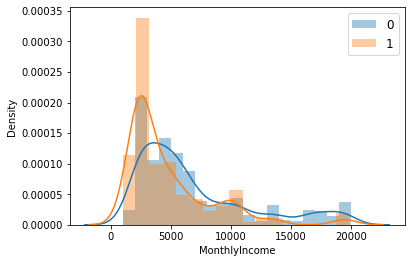

In [51]:
df = attrition_data[attrition_data.Attrition == 0]
sns.distplot(df['MonthlyIncome'], hist = True, kde = True, label='0')
df = attrition_data[attrition_data.Attrition == 1]
sns.distplot(df['MonthlyIncome'], hist = True, kde = True, label='1')
plt.legend(prop={'size': 12})
plt.xlabel('MonthlyIncome')
plt.ylabel('Density')  

<b>Insights</b>
- From the graph and table its evident that people with lower monthly income have a higher probability of attrition especially when the monthly income is very less.Once the salary is more than 5000 people tend to not leave the company

<b>So lets pick the top factors we analyzed till now that affect the attrition the most</b>
- Marital status
- Business travel
- Overtime
- Job involvement
- Job level
- Age
- Monthly income
- Total working years
- Since we have to only pick 5 lets do further analysis on it.Lets find the correlation between all the variables and attrition and lets consider 5 of these 8 factors that have highest correlation

<font size = 5><b>Lets find correlation!!</b>

1) <b>For numerical variables vs attrition </b>

This method uses <b>Pearsons coeficienct</b> for Continuous vs Continuous variables and it uses <b>Correlation ratio</b> for Categorical vs Continuous variables

In [52]:
corr = attrition_data.corr()

In [53]:
print (corr['Attrition'].sort_values(ascending=True), '\n')

TotalWorkingYears         -0.171063
JobLevel                  -0.169105
YearsInCurrentRole        -0.160545
MonthlyIncome             -0.159840
Age                       -0.159205
YearsWithCurrManager      -0.156199
YearsAtCompany            -0.134392
JobInvolvement            -0.130016
JobSatisfaction           -0.103481
EnvironmentSatisfaction   -0.103369
WorkLifeBalance           -0.063939
YearsSinceLastPromotion   -0.033019
DistanceFromHome           0.077924
Attrition                  1.000000
Name: Attrition, dtype: float64 



1) <b>For categorical variables vs attrition </b>

So far we have only found out The correlation with numeric variables .To find out the correlation between categorical variables and attrition lets use the following code where <b>Crameres V method</b> is used for finding correlation between categorical vs categorical variables 

In [54]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
#tips = sns.load_dataset("attrition.csv")
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [55]:
confusion_matrix_businessTravel = pd.crosstab(attrition_data["Attrition"],attrition_data["BusinessTravel"]).values
confusion_matrix_Overtime = pd.crosstab(attrition_data["Attrition"],attrition_data["OverTime"]).values
confusion_matrix_marital_status = pd.crosstab(attrition_data["Attrition"],attrition_data["MaritalStatus"]).values
confusion_matrix_WorkLifeBalance = pd.crosstab(attrition_data["Attrition"],attrition_data["WorkLifeBalance"]).values
confusion_matrix_EducationField = pd.crosstab(attrition_data["Attrition"],attrition_data["EducationField"]).values


<b>Lets Add the categorical corelation to our correlation matrix and then sort all the correlation in descending order</b>

In [56]:
corr['Attrition']['BusinessTravel'] = cramers_v(confusion_matrix_businessTravel)
corr['Attrition']['OverTime'] = cramers_v(confusion_matrix_Overtime)
corr['Attrition']['MaritalStatus'] = cramers_v(confusion_matrix_marital_status)
corr['Attrition']['WorkLifeBalance'] = cramers_v(confusion_matrix_WorkLifeBalance)
corr['Attrition']['EducationField'] = cramers_v(confusion_matrix_EducationField)
print (abs(corr['Attrition']).sort_values(ascending=False), '\n')

Attrition                  1.000000
OverTime                   0.242749
MaritalStatus              0.173386
TotalWorkingYears          0.171063
JobLevel                   0.169105
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
YearsWithCurrManager       0.156199
YearsAtCompany             0.134392
JobInvolvement             0.130016
BusinessTravel             0.122880
JobSatisfaction            0.103481
EnvironmentSatisfaction    0.103369
WorkLifeBalance            0.095234
EducationField             0.086617
DistanceFromHome           0.077924
YearsSinceLastPromotion    0.033019
Name: Attrition, dtype: float64 



Used this library for finding all types of correlation together in a single heatmap (also used this method to confirm if both methods of finding correlations are giving same answers)
This method uses
<b>Pearsons R</b> for continuous vs continuous cases
<b>Correlation ratio</b> for categorical vs continuous
<b>Cramers V</b> for categorical vs categorical


/Users/vinayashreek/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


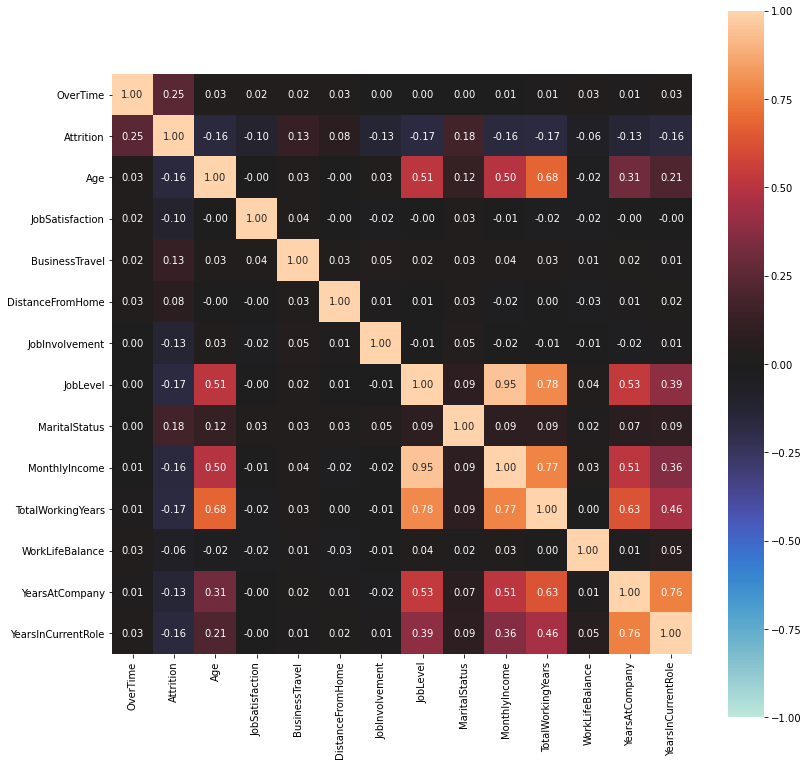

{'corr':                     OverTime  Attrition       Age  JobSatisfaction  \
 OverTime            1.000000   0.246118  0.028062         0.024539   
 Attrition           0.246118   1.000000 -0.159205        -0.103481   
 Age                 0.028062  -0.159205  1.000000        -0.004892   
 JobSatisfaction     0.024539  -0.103481 -0.004892         1.000000   
 BusinessTravel      0.024089   0.128260  0.029165         0.036567   
 DistanceFromHome    0.025514   0.077924 -0.001686        -0.003669   
 JobInvolvement      0.003507  -0.130016  0.029820        -0.021476   
 JobLevel            0.000544  -0.169105  0.509604        -0.001944   
 MaritalStatus       0.000000   0.177211  0.119727         0.025455   
 MonthlyIncome       0.006089  -0.159840  0.497855        -0.007157   
 TotalWorkingYears   0.012754  -0.171063  0.680381        -0.020185   
 WorkLifeBalance     0.027092  -0.063939 -0.021490        -0.019459   
 YearsAtCompany      0.011687  -0.134392  0.311309        -0.003803  

In [57]:
from dython import nominal
nominal.associations(attrition_data[['OverTime','Attrition','Age','JobSatisfaction','BusinessTravel','DistanceFromHome','JobInvolvement','JobLevel',
                          'MaritalStatus','MonthlyIncome','TotalWorkingYears','WorkLifeBalance','YearsAtCompany',
                          'YearsInCurrentRole']],figsize=(13,13))


<b> So Lets select 5 factors that has highest correlation from the 8 factors which we previously got</b>
- Overtime
- Marital status
- Total working years
- Job level
- Age
</b>


<font size = 5><b>Now lets  do some multivariateanalysis and further analyze how these 5 factors affect the attrition</b>

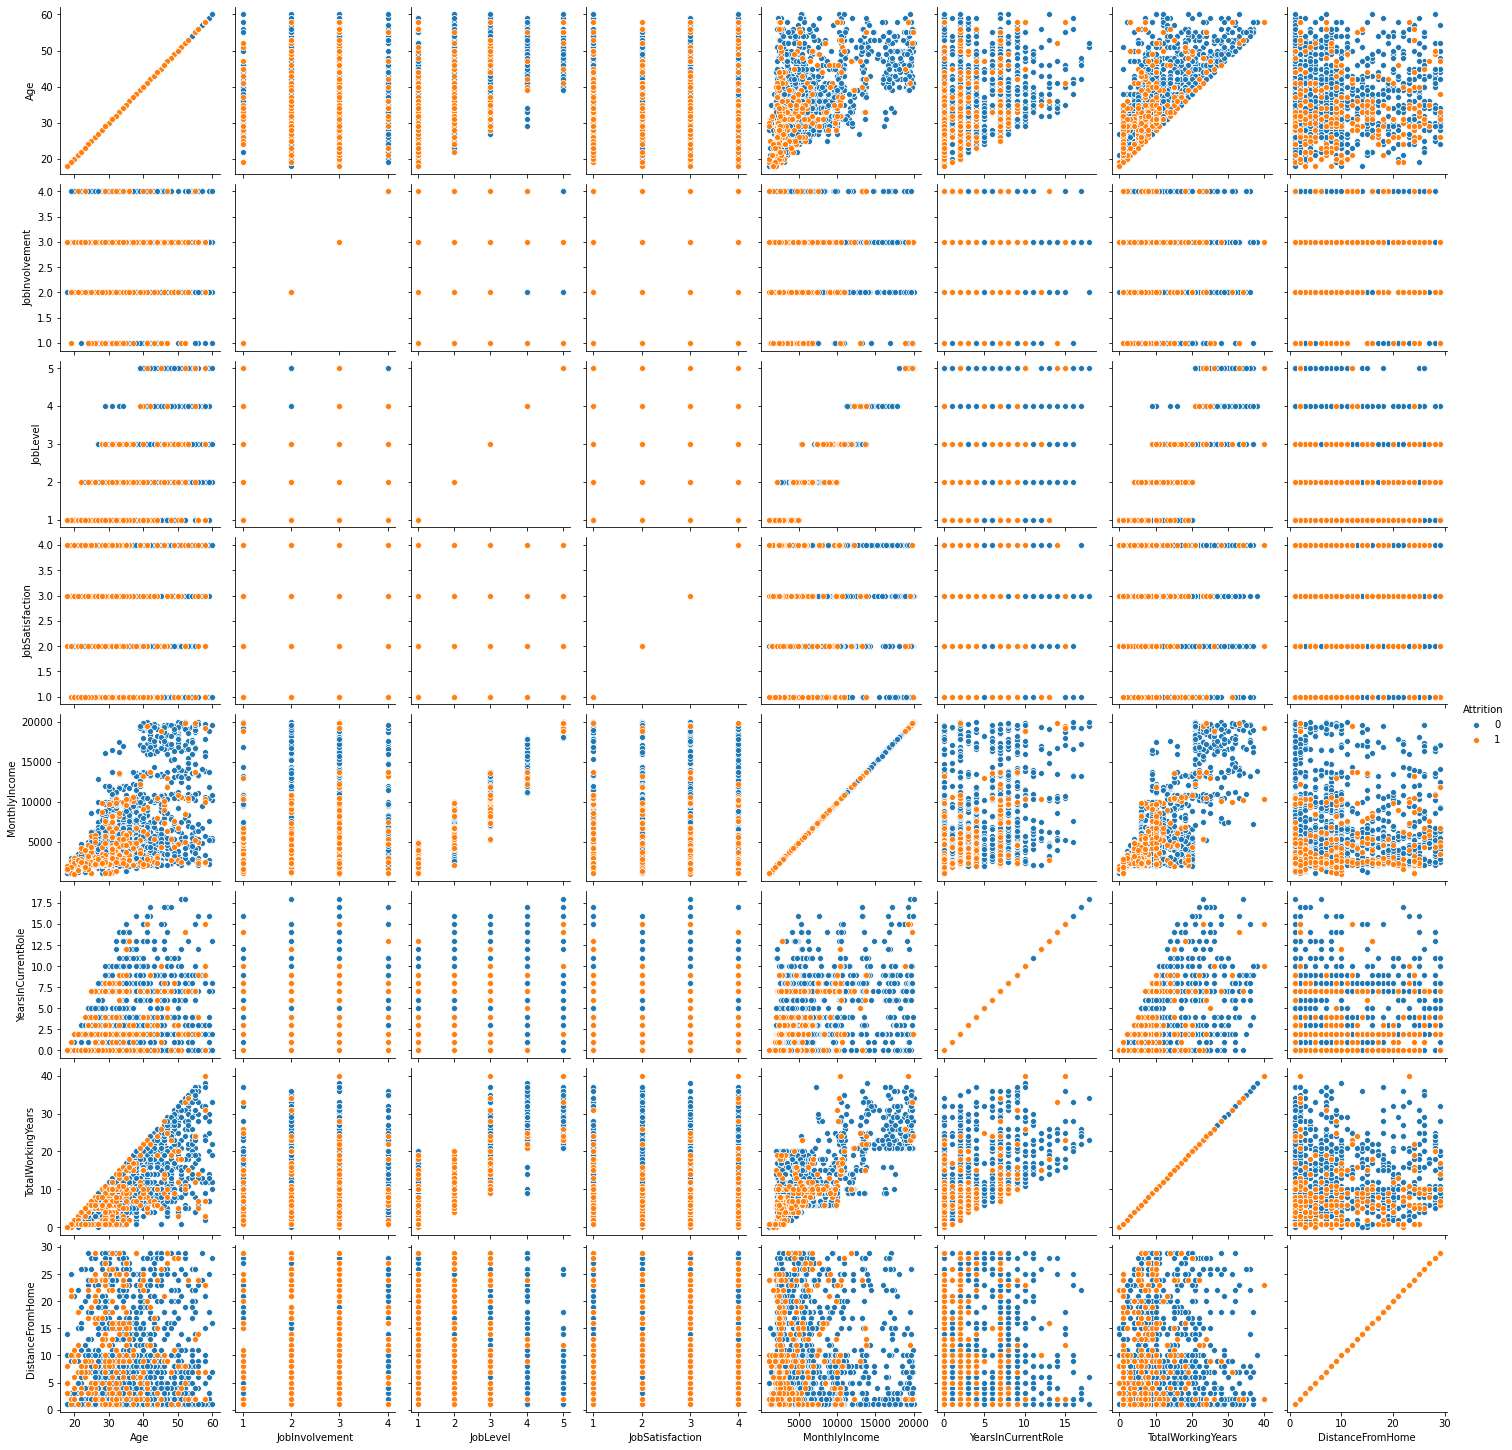

In [58]:
#We use Pairgrid to check how one variable is varying with other or to find pair to pair relation.
g = sns.PairGrid(attrition_data, vars=["Age","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome",
                            "YearsInCurrentRole","TotalWorkingYears","DistanceFromHome"], hue="Attrition")
g.map(sns.scatterplot)
g.add_legend()

<b>Affecting parameter 1: Overtime</b>

<Figure size 360x360 with 0 Axes>

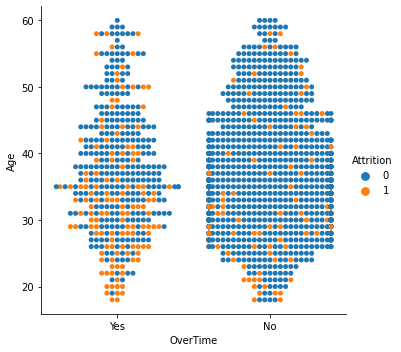

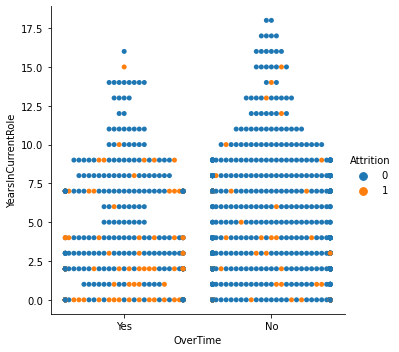

In [59]:
plt.figure(figsize=(5,5))
sns.catplot(x='OverTime',y='Age',hue='Attrition',kind='swarm',data=attrition_data)
sns.catplot(x='OverTime',y='YearsInCurrentRole',hue='Attrition',kind='swarm',data=attrition_data)


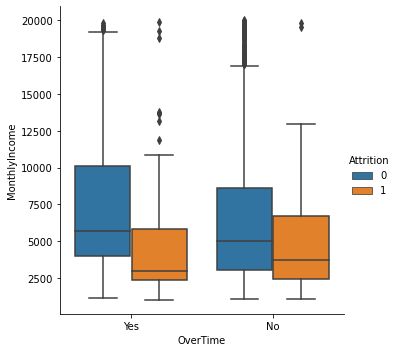

In [60]:
sns.catplot(x='OverTime',y='MonthlyIncome',hue='Attrition',kind="box",data=attrition_data)

 <b>Insight of over time</b>
 - Inference 1:Most of the people who left due to OverTime lie within the age group of 29-31
 - Inference 2:People are more likely to quit within 1 year of their current Role if they worked overtime as compared to people who did not do Overtime
 - Inference 3:People who do overtime and have a higher salary dont quit

<b>Affecting parameter 2: Marital status</b>

<Figure size 288x288 with 0 Axes>

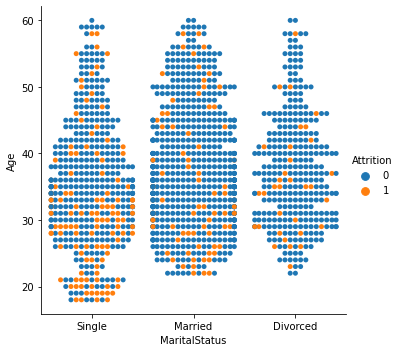

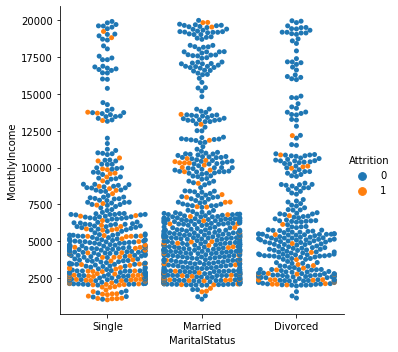

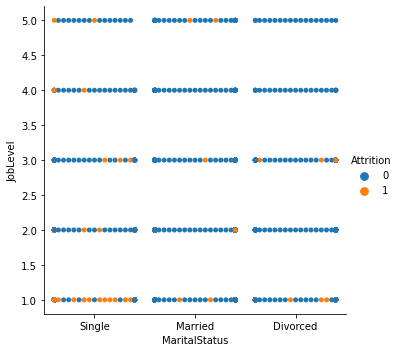

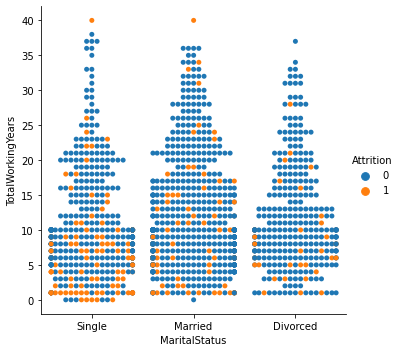

In [61]:
plt.figure(figsize=(4,4))
sns.catplot(x='MaritalStatus',y='Age',hue='Attrition',kind='swarm',data=attrition_data)
sns.catplot(x='MaritalStatus',y='MonthlyIncome',hue='Attrition',kind='swarm',data=attrition_data)
sns.catplot(x='MaritalStatus',y='JobLevel',hue='Attrition',kind='swarm',data=attrition_data)
sns.catplot(x='MaritalStatus',y='TotalWorkingYears',hue='Attrition',kind='swarm',data=attrition_data)

<b>Insight from MaritalStatus</b>
- People who are more likely to quit are Single with lower income <5000.
- People at joblevel 1 and single tend to quit after 1 year work experience because they are ready to take risk

<b>Affecting parameter 3: Total working years</b>

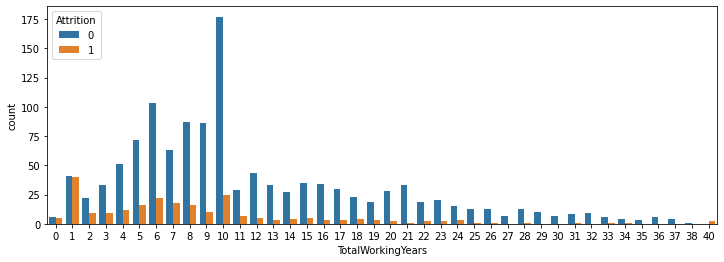

In [62]:
plt.subplots(figsize=(12,4))
factor1 = sns.countplot(x="TotalWorkingYears", hue="Attrition", data=attrition_data)

In [63]:
attrition_data[["Attrition","TotalWorkingYears"]].groupby(["Attrition"]).describe()


TotalWorkingYears                                                 
                      count       mean       std  min  25%   50%   75%   max
Attrition                                                                   
0                    1233.0  11.862936  7.760719  0.0  6.0  10.0  16.0  38.0
1                     237.0   8.244726  7.169204  0.0  3.0   7.0  10.0  40.0

<Figure size 288x288 with 0 Axes>

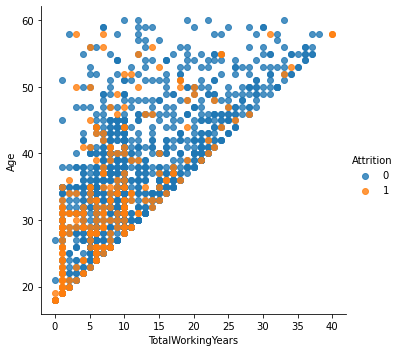

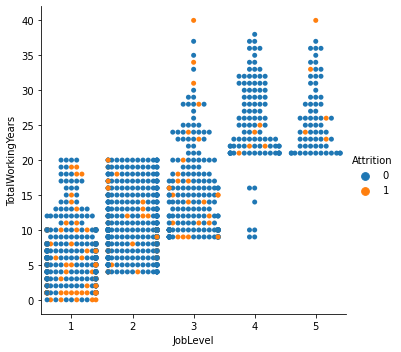

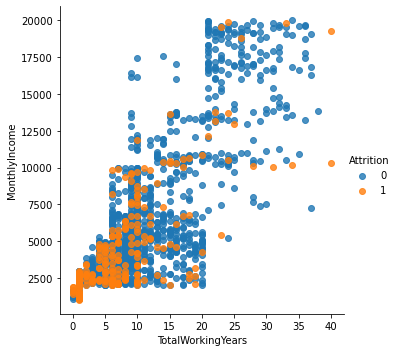

In [64]:
plt.figure(figsize=(4,4))
sns.lmplot(x='TotalWorkingYears',y='Age',hue='Attrition',fit_reg=False,data=attrition_data)
sns.catplot(y='TotalWorkingYears',x='JobLevel',hue='Attrition',kind="swarm",data=attrition_data)
sns.lmplot(x='TotalWorkingYears',y='MonthlyIncome',hue='Attrition',fit_reg=False,data=attrition_data)

<b>Insight from TotalWorkingYears</b>
- This is as expected as total working years increases -job level ,monthly income and age increases.People like changing jobs at lower job level ,at young age and when they have lower salary   

<b>Affecting parameter 4: Joblevel</b>

In [65]:
attrition_data[["Attrition","JobLevel"]].groupby(["Attrition"]).describe()

JobLevel                                             
             count      mean       std  min  25%  50%  75%  max
Attrition                                                      
0           1233.0  2.145985  1.117933  1.0  1.0  2.0  3.0  5.0
1            237.0  1.637131  0.940594  1.0  1.0  1.0  2.0  5.0

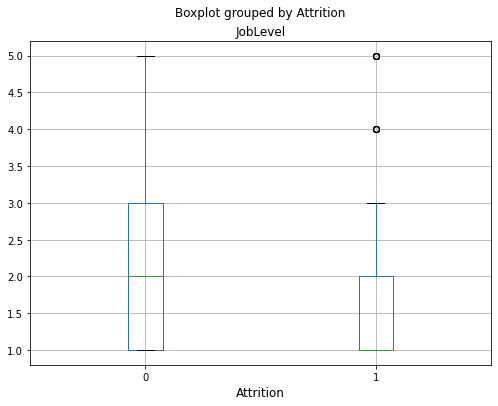

In [66]:
attrition_data.boxplot(column="JobLevel", notch=False,
        by="Attrition",
        grid=True,
        figsize=(8,6)
            )
plt.xlabel("Attrition",fontsize=12)
plt.show()

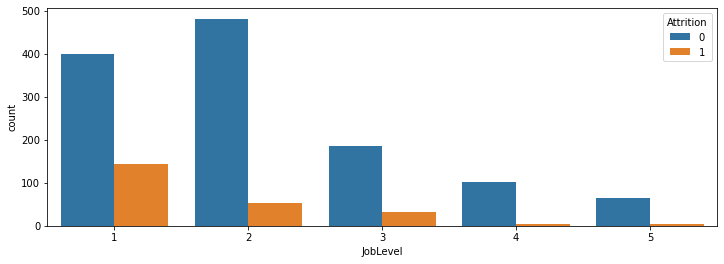

In [67]:
plt.subplots(figsize=(12,4))
factor1 = sns.countplot(x="JobLevel", hue="Attrition", data=attrition_data)

<Figure size 720x576 with 0 Axes>

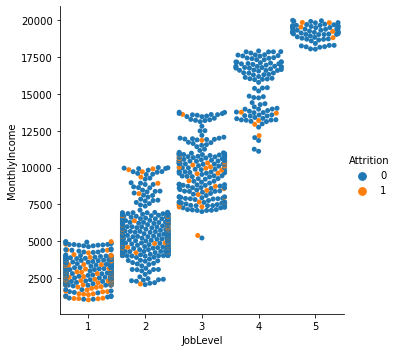

In [68]:
plt.figure(figsize=(10,8))
sns.catplot(x='JobLevel',y='MonthlyIncome',hue='Attrition',kind="swarm",data=attrition_data)

<b>Insight from Joblevel</b>
- People are more likely to quit at job level 1 & 2
- People at job level 1 & 2 have very low salary too .So that might be another reason for people quitting

<b>Affecting parameter 5: Age</b>

In [69]:
attrition_data[["Attrition","Age"]].groupby(["Attrition"]).describe()

Age                                                  
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
0          1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
1           237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

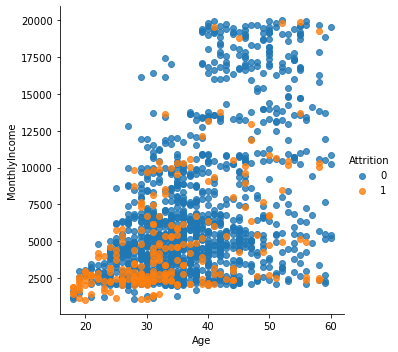

In [70]:
sns.lmplot(x='Age',y='MonthlyIncome',hue='Attrition',fit_reg=False,data=attrition_data)

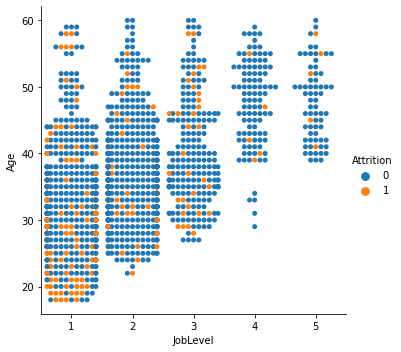

In [71]:
sns.catplot(x='JobLevel',y='Age',hue='Attrition',kind="swarm",data=attrition_data)

<b>Insight from Age</b>

- Avg age of people who might quit is 4 years lesser than avg age of people who will stay.
- People who have less monthly income,who are in lower job level and are young are more likely to quit

<font size = 5><b>
Summary:

5 Possible factors that seem to affect the attrition the most 
- Overtime
- Marital status
- Total working years
- Job level
- Age
</b></font>
